#  Installing and Importing Libraries 

In [ ]:
pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 137 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638198 sha256=fb7cbb23650f755fc1448e8fde7be0195de0fcfe06efc60ecc4109b38d2cf193
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import seaborn as sns

# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cleaned_Dataset.csv (2).zip',low_memory=False, compression= 'gzip')
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
0,2021-01-01 00:00:00,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,6.50,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333
1,2021-01-01 00:00:00,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,12.89,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000
2,2021-01-01 00:00:00,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,20.53,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000
3,2021-01-01 00:00:00,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,23.84,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000
4,2021-01-01 00:00:00,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,13.34,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31 00:00:00,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,8.00,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000
1014716,2021-12-31 00:00:00,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,12.50,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333
1014717,2021-12-31 00:00:00,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,9.00,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333
1014718,2021-12-31 00:00:00,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,13.00,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000


In [ ]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
df['lpep_dropoff_datetime'] = pd.to_datetime(df.lpep_dropoff_datetime)
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.dtypes

Date                     datetime64[ns]
Month                            object
Pickup_Time                      object
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
Drop_Time                        object
PULocationID                      int64
Pickup_Zone                      object
Pickup_Borough                   object
Pickup_Latitude                 float64
Pickup_Longitude                float64
DOLocationID                      int64
Dropoff_Zone                     object
Dropoff_Latitude                float64
Dropoff_Longitude               float64
Dropoff_Borough                  object
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['trips'] = df.reset_index().index
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
0,2021-01-01,January,19:39:11,2021-01-01 19:39:11,2021-01-01 19:45:01,19:45:01,95,Forest Hills,Queens,40.719594,...,1.0,0.5,2.08,0.0,0.3,10.38,0.0,1.915115,5.833333,0
1,2021-01-01,January,01:25:00,2021-01-01 01:25:00,2021-01-01 01:35:00,01:35:00,181,Park Slope,Brooklyn,40.670103,...,0.0,0.0,2.75,0.0,0.3,15.94,0.0,2.414010,10.000000,1
2,2021-01-01,January,01:04:00,2021-01-01 01:04:00,2021-01-01 01:12:00,01:12:00,159,Melrose South,Bronx,42.841617,...,0.0,0.0,2.75,0.0,0.3,23.58,0.0,2.864625,8.000000,2
3,2021-01-01,January,01:34:00,2021-01-01 01:34:00,2021-01-01 01:59:00,01:59:00,155,Marine Park/Mill Basin,Brooklyn,40.609833,...,0.0,0.0,2.75,0.0,0.3,26.89,0.0,8.175447,25.000000,3
4,2021-01-01,January,01:38:00,2021-01-01 01:38:00,2021-01-01 01:47:00,01:47:00,55,Coney Island,Brooklyn,40.575807,...,0.0,0.0,2.75,0.0,0.3,16.39,0.0,2.076049,9.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,2021-12-31,December,13:42:19,2021-12-31 13:42:19,2021-12-31 13:51:52,13:51:52,49,Clinton Hill,Brooklyn,40.689722,...,0.0,0.5,1.76,0.0,0.3,10.56,0.0,2.301356,9.550000,1014715
1014716,2021-12-31,December,14:01:55,2021-12-31 14:01:55,2021-12-31 14:18:36,14:18:36,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,2.66,0.0,0.3,15.96,0.0,4.554432,16.683333,1014716
1014717,2021-12-31,December,13:21:58,2021-12-31 13:21:58,2021-12-31 13:33:27,13:33:27,97,Fort Greene,Brooklyn,40.690771,...,0.0,0.5,0.00,0.0,0.3,9.80,0.0,2.365730,11.483333,1014717
1014718,2021-12-31,December,13:36:59,2021-12-31 13:36:59,2021-12-31 13:54:41,13:54:41,74,East Harlem North,Manhattan,42.057937,...,0.0,0.5,2.76,0.0,0.3,16.56,0.0,4.119910,17.700000,1014718


In [ ]:
Df = df.groupby(pd.Grouper(key='lpep_pickup_datetime', axis=0, freq='H')).count()
Df

,Date,Month,Pickup_Time,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,Pickup_Longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
2021-01-01 01:00:00,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
2021-01-01 02:00:00,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2021-01-01 03:00:00,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2021-01-01 04:00:00,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2021-12-31 20:00:00,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
2021-12-31 21:00:00,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


In [ ]:
Df.reset_index(inplace=True, level=['lpep_pickup_datetime'])
Df

,lpep_pickup_datetime,Date,Month,Pickup_Time,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,Pickup_Latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,trips
0,2021-01-01 00:00:00,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
1,2021-01-01 01:00:00,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
2,2021-01-01 02:00:00,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,2021-01-01 03:00:00,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
4,2021-01-01 04:00:00,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
8756,2021-12-31 20:00:00,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
8757,2021-12-31 21:00:00,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
8758,2021-12-31 22:00:00,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84


In [ ]:
DF=Df[['lpep_pickup_datetime','trips']]
DF

,lpep_pickup_datetime,trips
0,2021-01-01 00:00:00,52
1,2021-01-01 01:00:00,46
2,2021-01-01 02:00:00,22
3,2021-01-01 03:00:00,21
4,2021-01-01 04:00:00,11
...,...,...
8755,2021-12-31 19:00:00,124
8756,2021-12-31 20:00:00,131
8757,2021-12-31 21:00:00,95
8758,2021-12-31 22:00:00,84


In [ ]:
# inplace true preventing creating a new copy with the new the changes specified
# it makes the changes in the original file itself

DF.rename(columns= {'lpep_pickup_datetime':'ds','trips':'y'}, inplace = True)
DF

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2021-01-01 00:00:00,52
1,2021-01-01 01:00:00,46
2,2021-01-01 02:00:00,22
3,2021-01-01 03:00:00,21
4,2021-01-01 04:00:00,11
...,...,...
8755,2021-12-31 19:00:00,124
8756,2021-12-31 20:00:00,131
8757,2021-12-31 21:00:00,95
8758,2021-12-31 22:00:00,84


## Building Baseline Model

In [ ]:
# Train data -> 09|12|21 to 15|12|21
Train = DF.loc[(DF['ds'] > '2021-12-8 23:00:00') & (DF['ds'] < '2021-12-16 00:00:00')]
Train

,ds,y
8208,2021-12-09 00:00:00,43
8209,2021-12-09 01:00:00,23
8210,2021-12-09 02:00:00,16
8211,2021-12-09 03:00:00,9
8212,2021-12-09 04:00:00,16
...,...,...
8371,2021-12-15 19:00:00,187
8372,2021-12-15 20:00:00,148
8373,2021-12-15 21:00:00,112
8374,2021-12-15 22:00:00,89


In [ ]:
# Test data  -> 16|12|21
Test = DF.loc[(DF['ds'] > '2021-12-15 23:00:00') & (DF['ds']<'2021-12-17 00:00:00')]
Test

,ds,y
8376,2021-12-16 00:00:00,39
8377,2021-12-16 01:00:00,32
8378,2021-12-16 02:00:00,21
8379,2021-12-16 03:00:00,25
8380,2021-12-16 04:00:00,21
8381,2021-12-16 05:00:00,33
8382,2021-12-16 06:00:00,99
8383,2021-12-16 07:00:00,177
8384,2021-12-16 08:00:00,223
8385,2021-12-16 09:00:00,215


In [ ]:
# Initiate the model
baseline_model = Prophet(daily_seasonality = True, weekly_seasonality = True)
# Fit the model on the training dataset
baseline_model.fit(Train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = baseline_model.make_future_dataframe(periods=24,freq='H')
forecast = baseline_model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-09 00:00:00,142.319956,35.877308,102.567137,142.319956,142.319956,-75.450249,-75.450249,-75.450249,-86.762892,-86.762892,-86.762892,11.312643,11.312643,11.312643,0.0,0.0,0.0,66.869707
1,2021-12-09 01:00:00,142.369258,20.175608,87.808612,142.369258,142.369258,-87.996867,-87.996867,-87.996867,-99.136361,-99.136361,-99.136361,11.139494,11.139494,11.139494,0.0,0.0,0.0,54.372392
2,2021-12-09 02:00:00,142.418561,5.828837,72.831856,142.418561,142.418561,-102.980281,-102.980281,-102.980281,-113.892904,-113.892904,-113.892904,10.912623,10.912623,10.912623,0.0,0.0,0.0,39.438280
3,2021-12-09 03:00:00,142.467863,-7.630681,60.031807,142.467863,142.467863,-118.098156,-118.098156,-118.098156,-128.736007,-128.736007,-128.736007,10.637850,10.637850,10.637850,0.0,0.0,0.0,24.369707
4,2021-12-09 04:00:00,142.517166,-14.306280,55.607279,142.517166,142.517166,-122.153607,-122.153607,-122.153607,-132.475251,-132.475251,-132.475251,10.321644,10.321644,10.321644,0.0,0.0,0.0,20.363558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-16 19:00:00,151.539019,167.352482,235.596152,151.539015,151.539024,50.427918,50.427918,50.427918,44.591520,44.591520,44.591520,5.836398,5.836398,5.836398,0.0,0.0,0.0,201.966938
188,2021-12-16 20:00:00,151.588319,138.020903,209.021280,151.588314,151.588324,22.091739,22.091739,22.091739,16.216011,16.216011,16.216011,5.875728,5.875728,5.875728,0.0,0.0,0.0,173.680058
189,2021-12-16 21:00:00,151.637618,103.991401,172.611868,151.637613,151.637624,-10.676811,-10.676811,-10.676811,-16.660968,-16.660968,-16.660968,5.984157,5.984157,5.984157,0.0,0.0,0.0,140.960807
190,2021-12-16 22:00:00,151.686917,75.428950,142.876738,151.686911,151.686923,-41.728484,-41.728484,-41.728484,-47.891115,-47.891115,-47.891115,6.162630,6.162630,6.162630,0.0,0.0,0.0,109.958433


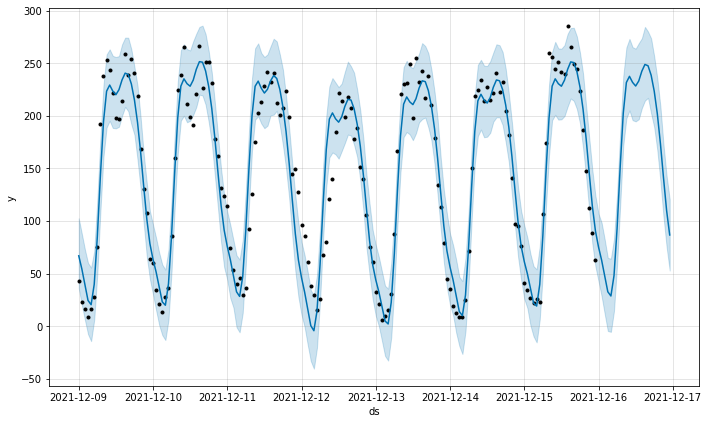

In [ ]:
plot = baseline_model.plot(forecast)

In [ ]:
# Merge actual and predicted values
performance = pd.merge(Test, forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']], on='ds')

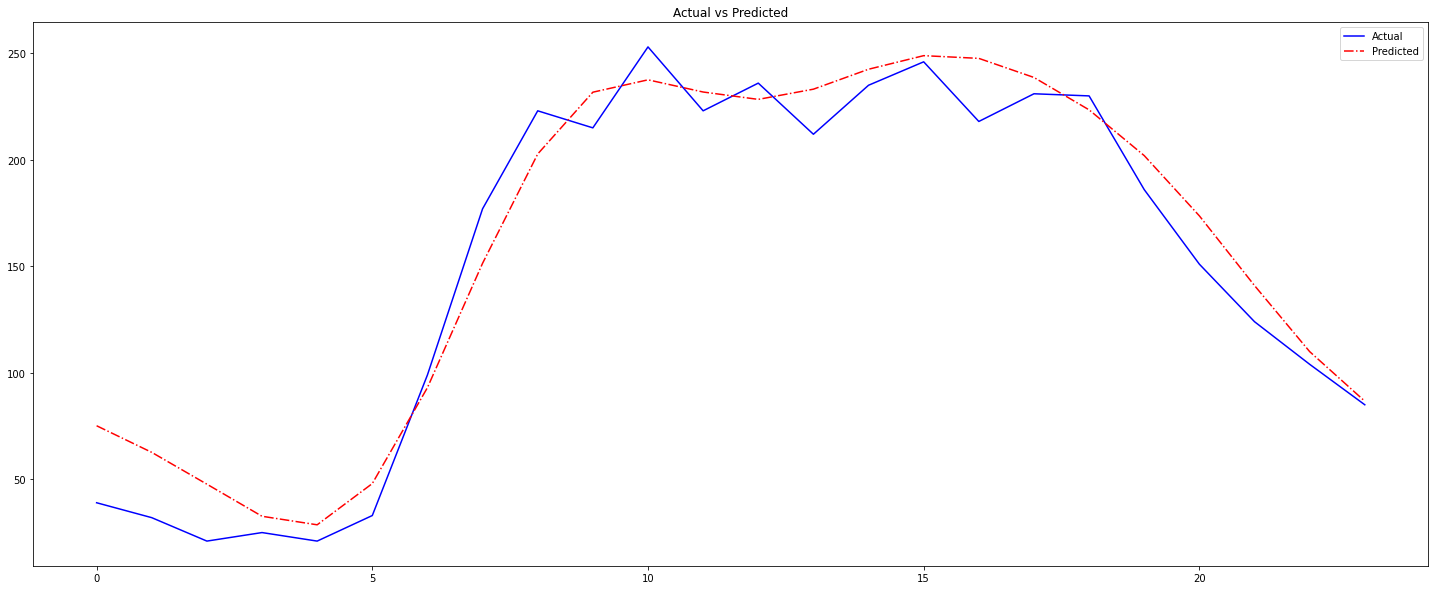

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Actual vs Predicted")
plt.plot(performance['y'], label = "Actual",linestyle="-",color="Blue")
plt.plot(performance['yhat'], label = "Predicted",linestyle="-.",color="Red")
figsize=(25,10)
plt.legend()
plt.show()

In [ ]:
# Checking MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])*100
print(f'The MAPE for the baseline model is {performance_MAPE} %')

The MAPE for the baseline model is 23.248281780724454 %


## Model Building (Without Holiday)

In [ ]:
# Train data -> 09|12|21 to 15|12|21
Train = DF.loc[(DF['ds'] > '2021-12-08 23:00:00') & (DF['ds'] < '2021-12-16 00:00:00')]

In [ ]:
# Test data  -> 16|12|21
Test = DF.loc[(DF['ds'] > '2021-12-15 23:00:00') & (DF['ds']<'2021-12-17 00:00:00')]

In [ ]:
#Combined train and test data
Train_Test = DF.loc[(DF['ds'] > '2021-12-08 23:00:00') & (DF['ds']<'2021-12-17 00:00:00')]

In [ ]:
# Hyperparameter tuning
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [60,50,90,92],
    'seasonality_mode': ['additive'],
    'daily_seasonality':[5,10,15,7],
    'interval_width' : [0.8,0.9,0.7]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Create a list to store MAPE values for each combination
mapes = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(Train_Test)  
    # Cross-validation
    df_cv = cross_validation(m, initial='167 hours', period='1 hour', horizon = '1 day', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes

# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-15 23:00:00 and 2021-12-15 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffb302c1150>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-15 23:00:00 and 2021-12-15 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffb2fc94b50>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet wit

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 92, 'seasonality_mode': 'additive', 'daily_seasonality': 10, 'interval_width': 0.8}


In [ ]:
model = Prophet(interval_width=0.8,daily_seasonality=False
                ,changepoint_prior_scale=0.001,seasonality_prior_scale=92).add_seasonality(name='daily',period=1,fourier_order=10)
# Fit the model on the training dataset
model.fit(Train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
# Predicting for test data -> 16|12|21
future = model.make_future_dataframe(periods=24,freq='H')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-09 00:00:00,149.982610,26.370962,97.874210,149.982610,149.982610,-87.992929,-87.992929,-87.992929,-87.992929,-87.992929,-87.992929,0.0,0.0,0.0,61.989681
1,2021-12-09 01:00:00,149.956795,8.851473,80.238530,149.956795,149.956795,-103.890079,-103.890079,-103.890079,-103.890079,-103.890079,-103.890079,0.0,0.0,0.0,46.066716
2,2021-12-09 02:00:00,149.930980,-7.505464,65.243775,149.930980,149.930980,-120.853612,-120.853612,-120.853612,-120.853612,-120.853612,-120.853612,0.0,0.0,0.0,29.077368
3,2021-12-09 03:00:00,149.905165,-11.504911,60.159681,149.905165,149.905165,-124.896671,-124.896671,-124.896671,-124.896671,-124.896671,-124.896671,0.0,0.0,0.0,25.008494
4,2021-12-09 04:00:00,149.879350,-10.920305,62.116574,149.879350,149.879350,-124.583609,-124.583609,-124.583609,-124.583609,-124.583609,-124.583609,0.0,0.0,0.0,25.295741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-16 19:00:00,145.155180,154.660744,228.126668,145.155180,145.155181,48.023408,48.023408,48.023408,48.023408,48.023408,48.023408,0.0,0.0,0.0,193.178588
188,2021-12-16 20:00:00,145.129365,123.159155,196.842343,145.129365,145.129366,13.420960,13.420960,13.420960,13.420960,13.420960,13.420960,0.0,0.0,0.0,158.550326
189,2021-12-16 21:00:00,145.103550,84.981253,157.903206,145.103549,145.103551,-23.385280,-23.385280,-23.385280,-23.385280,-23.385280,-23.385280,0.0,0.0,0.0,121.718270
190,2021-12-16 22:00:00,145.077735,68.032895,137.649932,145.077734,145.077736,-42.508580,-42.508580,-42.508580,-42.508580,-42.508580,-42.508580,0.0,0.0,0.0,102.569155


In [ ]:
Data = DF.loc[(DF['ds'] > '2021-12-08 23:00:00') & (DF['ds'] < '2021-12-17 00:00:00')]
Data

,ds,y
8208,2021-12-09 00:00:00,43
8209,2021-12-09 01:00:00,23
8210,2021-12-09 02:00:00,16
8211,2021-12-09 03:00:00,9
8212,2021-12-09 04:00:00,16
...,...,...
8395,2021-12-16 19:00:00,186
8396,2021-12-16 20:00:00,151
8397,2021-12-16 21:00:00,124
8398,2021-12-16 22:00:00,104


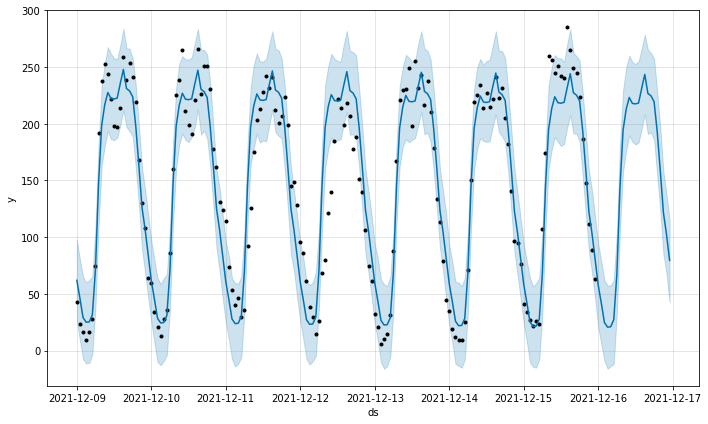

In [ ]:
plot = model.plot(forecast)

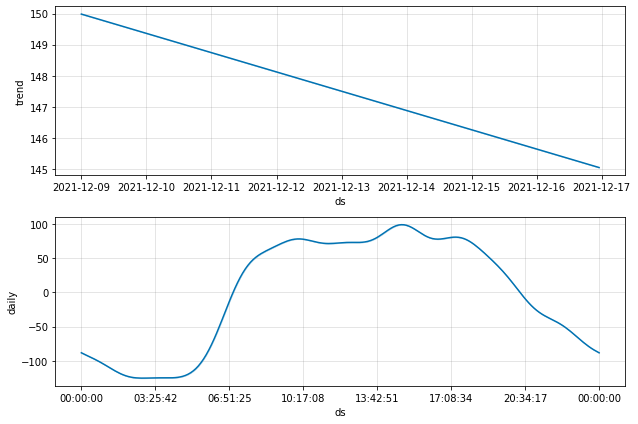

In [ ]:
# Visualize the forecast components
model.plot_components(forecast);

In [ ]:
# Merge actual and predicted values
# Comapring 16|12|21 forecasted values using model with the actual values
performance = pd.merge(Test, forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']], on='ds')
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-12-16 00:00:00,39,57.652739,20.603133,94.496891
1,2021-12-16 01:00:00,32,41.729773,5.606983,78.236423
2,2021-12-16 02:00:00,21,24.740425,-8.974155,62.045407
3,2021-12-16 03:00:00,25,20.671551,-16.014514,57.288595
4,2021-12-16 04:00:00,21,20.958798,-13.768910,57.602236
5,2021-12-16 05:00:00,33,27.134319,-11.960211,61.785538
6,2021-12-16 06:00:00,99,67.224733,32.638565,103.198643
7,2021-12-16 07:00:00,177,142.924855,106.058427,180.941830
8,2021-12-16 08:00:00,223,194.297105,158.004745,229.410763
9,2021-12-16 09:00:00,215,212.683890,176.012282,249.725449


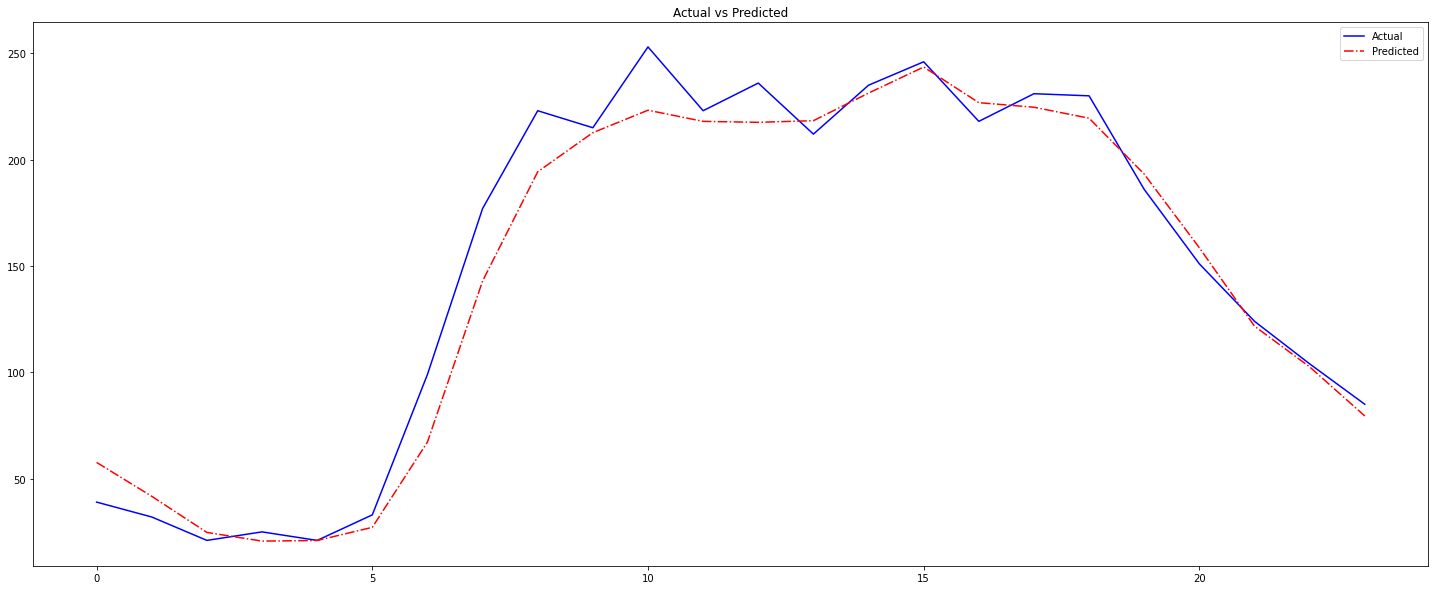

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Actual vs Predicted")
plt.plot(performance['y'], label = "Actual",linestyle="-",color="Blue")
plt.plot(performance['yhat'], label = "Predicted",linestyle="-.",color="Red")
figsize=(25,10)
plt.legend()
plt.show()

In [ ]:
# Checking MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])*100
print(f'The MAPE for the model (non holiday period) is {performance_MAPE} % ')

The MAPE for the model (non holiday period) is 10.580049769524598 % 


##**Model Building for Holiday Period**

In [ ]:
# Train data -> 21|12|21 to 27|12|21
Train = DF.loc[(DF['ds'] > '2021-12-20 23:00:00') & (DF['ds'] < '2021-12-28 00:00:00')]

In [ ]:
# Test data  -> 28|12|21
Test = DF.loc[(DF['ds'] > '2021-12-27 23:00:00') & (DF['ds']<'2021-12-29 00:00:00')]

In [ ]:
# Entire Train and Test data
Train_Test = DF.loc[(DF['ds'] > '2021-12-20 23:00:00') & (DF['ds']<'2021-12-29 00:00:00')]

In [ ]:
# CHRISTMAS time window
CHRISTMAS = pd.DataFrame({
    'holiday': 'CHRISTMAS',
    'ds': pd.to_datetime(['2021-12-25 01:00:00']),
    'lower_window': -1,
    'upper_window': 23,    
})

# Combine all events
events = CHRISTMAS
# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,CHRISTMAS,2021-12-25 01:00:00,-1,23


In [ ]:
# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.01,0.2,0.1,0.4,0.3],
    'seasonality_prior_scale': [40,50,60,70],
    'seasonality_mode': ['additive','multiplicative'],
    'daily_seasonality':[5,7,10,15],
    'interval_width' : [0.6,0.8,0.7],
    'holidays_prior_scale': [5,10,15]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Create a list to store MAPE values for each combination
mapes = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(data)  
    # Cross-validation
    df_cv = cross_validation(m, initial='167 hours', period='1 hour', horizon = '1 day', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes

# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

Streaming output truncated to the last 5000 lines.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-27 23:00:00 and 2021-12-27 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffb2ed58d90>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-12-27 23:00:00 and 2021-12-27 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffb2eb0b390>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbpr

{'changepoint_prior_scale': 0.4, 'seasonality_prior_scale': 60, 'seasonality_mode': 'multiplicative', 'daily_seasonality': 10, 'interval_width': 0.6, 'holidays_prior_scale': 5}


In [ ]:
holiday = Prophet(interval_width=0.6,daily_seasonality=False
                  ,changepoint_prior_scale=0.2,seasonality_prior_scale=40,holidays_prior_scale=5,holidays = events).add_seasonality(name='daily',period=1,fourier_order=7)
holiday.fit(Train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = holiday.make_future_dataframe(periods=24,freq='H')
forecast = holiday.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CHRISTMAS,CHRISTMAS_lower,CHRISTMAS_upper,additive_terms,...,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-21 00:00:00,127.692250,42.972468,83.274398,127.692250,127.692250,0.0,0.0,0.0,-66.715445,...,-66.715445,-66.715445,-66.715445,0.0,0.0,0.0,0.0,0.0,0.0,60.976805
1,2021-12-21 01:00:00,127.680243,25.301393,64.939275,127.680243,127.680243,0.0,0.0,0.0,-82.872977,...,-82.872977,-82.872977,-82.872977,0.0,0.0,0.0,0.0,0.0,0.0,44.807267
2,2021-12-21 02:00:00,127.668236,17.840773,58.112199,127.668236,127.668236,0.0,0.0,0.0,-89.975872,...,-89.975872,-89.975872,-89.975872,0.0,0.0,0.0,0.0,0.0,0.0,37.692364
3,2021-12-21 03:00:00,127.656229,18.154805,57.916231,127.656229,127.656229,0.0,0.0,0.0,-89.263547,...,-89.263547,-89.263547,-89.263547,0.0,0.0,0.0,0.0,0.0,0.0,38.392682
4,2021-12-21 04:00:00,127.644222,18.509055,59.079112,127.644222,127.644222,0.0,0.0,0.0,-87.500765,...,-87.500765,-87.500765,-87.500765,0.0,0.0,0.0,0.0,0.0,0.0,40.143457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-28 19:00:00,90.412414,101.204262,139.329975,90.198727,90.607013,0.0,0.0,0.0,28.362991,...,28.362991,28.362991,28.362991,0.0,0.0,0.0,0.0,0.0,0.0,118.775406
188,2021-12-28 20:00:00,90.116763,72.698073,112.650135,89.889335,90.324881,0.0,0.0,0.0,0.972282,...,0.972282,0.972282,0.972282,0.0,0.0,0.0,0.0,0.0,0.0,91.089044
189,2021-12-28 21:00:00,89.821111,44.566275,85.713405,89.572835,90.045022,0.0,0.0,0.0,-24.637080,...,-24.637080,-24.637080,-24.637080,0.0,0.0,0.0,0.0,0.0,0.0,65.184030
190,2021-12-28 22:00:00,89.525459,30.741030,70.153111,89.258134,89.761482,0.0,0.0,0.0,-38.904806,...,-38.904806,-38.904806,-38.904806,0.0,0.0,0.0,0.0,0.0,0.0,50.620653


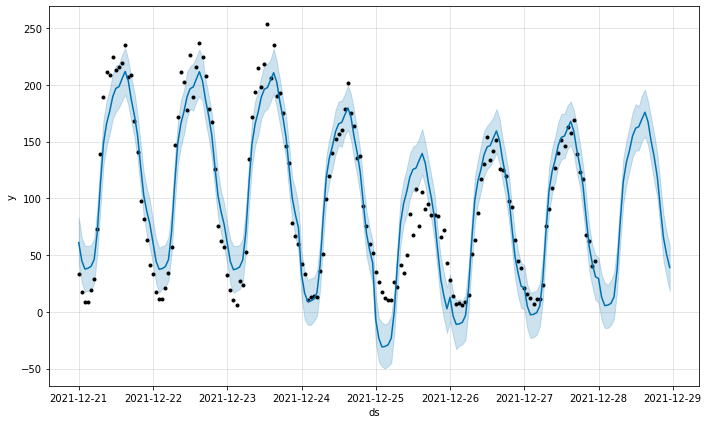

In [ ]:
plot = holiday.plot(forecast)

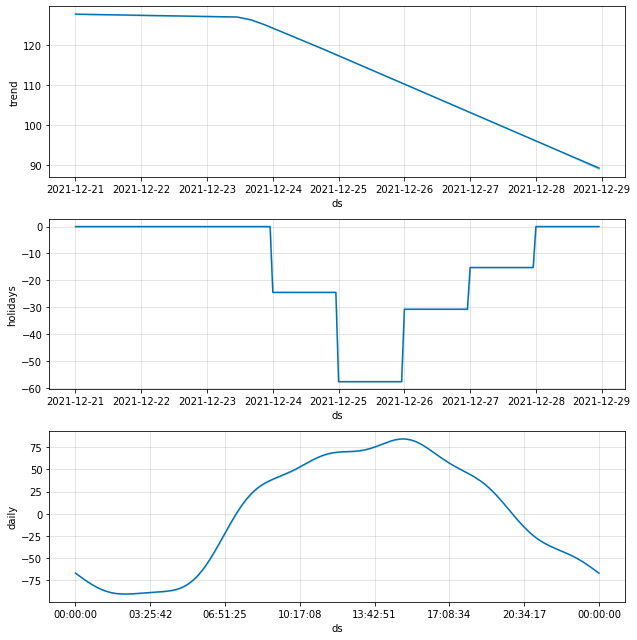

In [ ]:
# Visualize the forecast components
holiday.plot_components(forecast);

In [ ]:
# Merge actual and predicted values
performance = pd.merge(Test, forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']], on='ds')
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-12-28 00:00:00,24,29.314354,8.024425,47.968462
1,2021-12-28 01:00:00,15,12.861170,-7.126880,32.457377
2,2021-12-28 02:00:00,6,5.462623,-14.291856,25.734924
3,2021-12-28 03:00:00,6,5.879296,-14.257328,23.569285
4,2021-12-28 04:00:00,7,7.346426,-11.769046,27.381903
5,2021-12-28 05:00:00,14,13.166588,-5.924204,34.020393
6,2021-12-28 06:00:00,23,37.071237,18.576687,57.299812
7,2021-12-28 07:00:00,68,78.615786,59.081411,98.320506
8,2021-12-28 08:00:00,115,114.772755,95.292149,134.946642
9,2021-12-28 09:00:00,115,131.811986,112.154617,150.870318


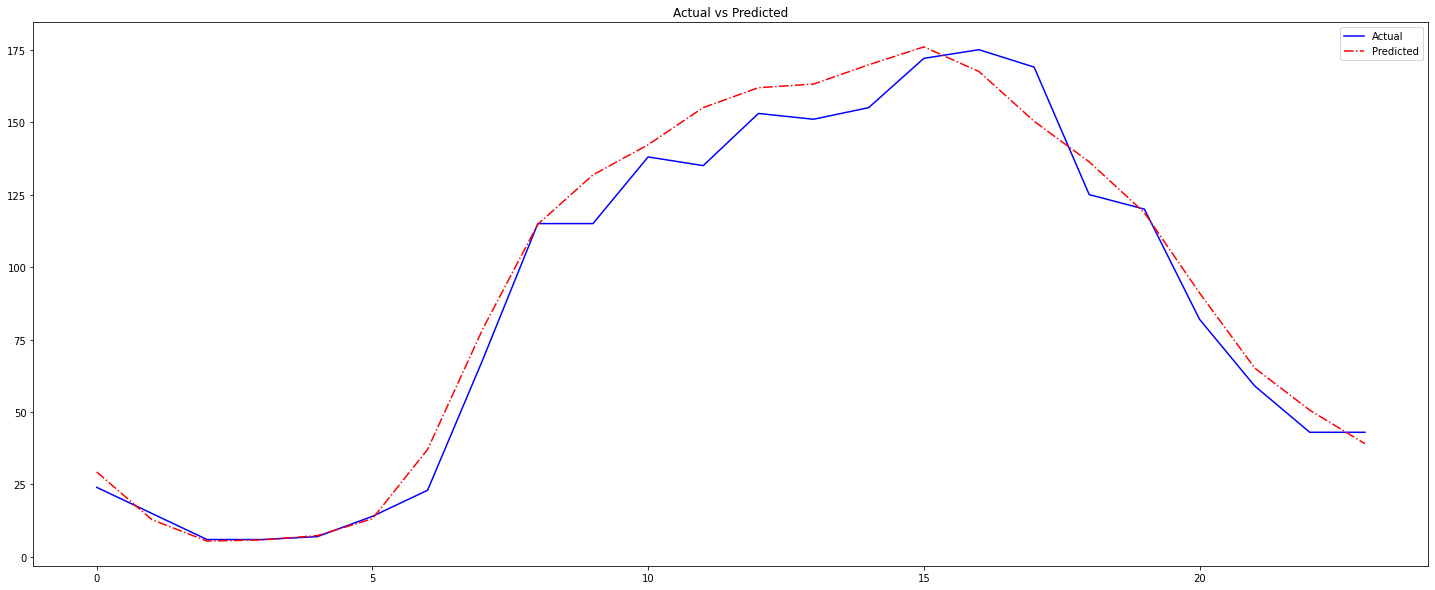

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Actual vs Predicted")
plt.plot(performance['y'], label = "Actual",linestyle="-",color="Blue")
plt.plot(performance['yhat'], label = "Predicted",linestyle="-.",color="Red")
figsize=(25,10)
plt.legend()
plt.show()

In [ ]:
mape = np.mean(np.abs((performance['y'] - performance['yhat'])/performance['y']))*100
mape

11.138863255740096

In [ ]:
# Checking MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])*100
print(f'The MAPE for the model (non holiday period) is {performance_MAPE} %')

The MAPE for the model (non holiday period) is 11.138863255740096 %


## END